In [2]:
#Code written by: Billy Atkinson (watkinson@umces.edu)
#Date of last revision: 06/14/2022
#Code reads in satellite data for NPP, phytoplankton carbon biomass, Chl, and temperautre for daily resolution and 8 day composite fields
#Plot timeseries of each variable for all years to determine which years had high or low Chl, NPP etc. 
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma
import glob
import os

In [3]:

ds8 = xr.open_mfdataset('/data/watkinson/Spring2022/Satellite/data/eddies/Anticyclonic/Anticyclonic_*.nc',combine='nested',concat_dim='time')#load in the first Cyclonic eddy file from the directory (02/08/1999)

#ds2 = xr.open_dataset('/data/watkinson/Spring2022/Satellite/data/eddies/Anticyclonic/Anticyclonic_20120619.nc')
#ds = ds.concat(ds2)
#ds

df8 = ds8.to_dataframe()
#df8 = df8.iloc[0:150,[3,9,22]]
df8['amplitude'].describe() #compute statistics for each variable, could probably do this for each day or something
#df8 = df8.reset_index(drop=True)
#df8 = df8.iloc[:,[0,3,4,8,19,22]]
#df8 = df8.iloc[[52,53],[0,3,22]]
#df8 = df8.reset_index(drop=True)
#df8['effective_contour_latitude'] = df8.groupby('obs').effective_contour_latitude.transform('unique')
#df8['effective_contour_latitude','effective_contour_longitude','speed_contour_latitude','speed_contour_longitude'] = df8.groupby('obs')
#df8.groupby((df8.index // 50).agg(' '.join))
#df8['effective_contour_latitude'].groupby(np.repeat(np.arange(len(df8)), 4)[:len(df8)]).agg(' '.join)
#df8['effective_contour_latitude'] = df8.groupby(['Nbsample'])['effective_contour_latitude']
#df8['effective_contour_latitude'] = df8.groupby(df8['effective_contour_latitude'] // 50).apply(' '.join)

#df8.groupby(['latitude_max'])['amplitude','effective_area','effective_contour_height','effective_contour_latitude',
#                              'effective_contour_longitude','effective_contour_shape_error','effective_radius','inner_contour_height','latitude',
 #                             'latitude_max','longitude','longitude_max','num_contours','num_point_e','num_point_s','speed_area','speed_average',
 #                             'speed_contour_height','speed_contour_latitude','speed_contour_longitude','speed_contour_shape_error','speed_radius',
 #                             'time','uavg_profile'].apply(l).reset_index

#df8.groupby(['latitude_max'])['amplitude','effective_area','effective_contour_height','effective_contour_latitude'].apply(','.join).reset_index
#df8['amplitude','effective_area','effective_contour_height','effective_contour_latitude',
#                              'effective_contour_longitude','effective_contour_shape_error','effective_radius','inner_contour_height','latitude',
#                              'latitude_max','longitude','longitude_max','num_contours','num_point_e','num_point_s','speed_area','speed_average',
#                              'speed_contour_height','speed_contour_latitude','speed_contour_longitude','speed_contour_shape_error','speed_radius',
#                              'time','uavg_profile']=df8.groupby(['latitude_max'].apply(','.join).reset_index
#print(df8['effective_contour_latitude'])
#print(df8)
#print(df8)

#for v in df8.columns:
#    print(v)

#df8['amplitude','effective_area','effective_contour_height','effective_contour_latitude','effective_contour_longitude','effective_contour_shape_error',
#                    'effective_radius','inner_contour_height','latitude','latitude_max','longitude','longitude_max','num_contours','num_point_e','num_point_s','speed_area',
#                    'speed_average','speed_contour_height','speed_contour_latitude','speed_contour_longitude','speed_contour_shape_error','speed_radius','time','uavg_profile']=df8.groupby(['latitude_max'].apply(','.join).reset_index

#df8['amplitude','effective_area','effective_contour_height','effective_contour_latitude','effective_contour_longitude','effective_contour_shape_error','effective_radius','inner_contour_height','latitude','latitude_max','longitude','longitude_max','num_contours','num_point_e','num_point_s','speed_area','speed_average','speed_contour_height','speed_contour_latitude','speed_contour_longitude','speed_contour_shape_error','speed_radius','time','uavg_profile']=df8.groupby(['latitude_max'].apply(','.join).reset_index
#print(df8)
#print(df8.effective_contour_latitude[0:50])

ValueError: arguments without labels along dimension 'obs' cannot be aligned because they have different dimension sizes: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22}

In [53]:
#df8['amplitude','effective_area','effective_contour_height','effective_contour_latitude','effective_contour_longitude','effective_contour_shape_error','effective_radius','inner_contour_height','latitude','latitude_max','longitude','longitude_max','num_contours','num_point_e','num_point_s','speed_area','speed_average','speed_contour_height','speed_contour_latitude','speed_contour_longitude','speed_contour_shape_error','speed_radius','time','uavg_profile']=df8.groupby(['latitude_max']).apply(','.join).reset_index()

In [24]:
# List all matching files
files = sorted(glob.glob('/data/watkinson/Spring2022/Satellite/data/eddies/Anticyclonic/*.nc'))
num_files = len(files)#number of Cyclonic eddy files for the loop
#print(files)
#print(num_files)

ds = xr.open_dataset(files[0])#load in the first Cyclonic eddy file from the directory (02/08/1999)
df = ds.to_dataframe()#convert xarray Dataset to panda dataframe
#print(df)

n  = 1
while n < num_files:
    # Load a single dataset
    xs = xr.open_dataset(files[n])
    df2 = xs.to_dataframe()
    
    # Add the dataset to the list
    df = df.append(df2)
    n=n+1

In [25]:
#df.head()
dir = '/data/watkinson/Spring2022/Satellite/data/eddies/'
df.to_pickle(dir + 'Anticyclonic_eddies.pkl')

In [6]:
#dir = '/data/watkinson/Spring2022/Satellite/data/eddies/'
#df.to_pickle(dir + 'Cyclonic_eddies.pkl')

In [5]:
dir = '/data/watkinson/Spring2022/Satellite/data/eddies/'
cycl_eddies = pd.read_pickle(dir + "Cyclonic_eddies.pkl")
anti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies.pkl")
print(cycl_eddies['amplitude'].describe())
print(anti_eddies['amplitude'].describe())
'''
#cycl_eddies.dtypes
count_cycl = cycl_eddies.groupby('time')['amplitude'].count()
count_cycl = count_cycl/50
count_cycl = count_cycl["2002-07-04":"2012-06-19"]
#anti_eddies.dytpes
count_anti = anti_eddies.groupby('time')['amplitude'].count()
count_anti = count_anti/50
count_anti = count_anti["2002-07-04":"2012-06-19"]
print(count_anti)
'''

count    2.488300e+06
mean     7.295918e-02
std      6.616037e-02
min      2.000000e-02
25%      3.000000e-02
50%      4.800000e-02
75%      8.900000e-02
max      5.580000e-01
Name: amplitude, dtype: float64
count    1.691700e+06
mean     8.913908e-02
std      7.484586e-02
min      2.000000e-02
25%      3.300000e-02
50%      6.300000e-02
75%      1.220000e-01
max      5.430000e-01
Name: amplitude, dtype: float64


'\n#cycl_eddies.dtypes\ncount_cycl = cycl_eddies.groupby(\'time\')[\'amplitude\'].count()\ncount_cycl = count_cycl/50\ncount_cycl = count_cycl["2002-07-04":"2012-06-19"]\n#anti_eddies.dytpes\ncount_anti = anti_eddies.groupby(\'time\')[\'amplitude\'].count()\ncount_anti = count_anti/50\ncount_anti = count_anti["2002-07-04":"2012-06-19"]\nprint(count_anti)\n'

In [16]:
ds = cycl_eddies.iloc[6::50,:]
ds3 = anti_eddies.iloc[6::50,:]
#ds

In [17]:
ds2 = ds.iloc[:,[1,18]]#selecting amplitude and time from the ds dataframe
ds2 = ds2.reset_index(drop=True)#drop previous method of indexing and reset
ds2['time2']=pd.to_datetime(ds2['time'])#convert entire "Dates" Column to datetime format this time 
ds2.index=ds2['time2']#replace index with entire "Dates" Column to work with groupby function
ds2 = ds2.iloc[:,[0]]#simplify dataframe to just time index and amplitude
ds2 = ds2["2002-07-04":"2012-06-19"]
ds2 = ds2.dropna()
ds4 = ds3.iloc[:,[1,18]]#selecting amplitude(0) and time from the ds dataframe 12=speed
ds4 = ds4.reset_index(drop=True)#drop previous method of indexing and reset
ds4['time2']=pd.to_datetime(ds4['time'])#convert entire "Dates" Column to datetime format this time 
ds4.index=ds4['time2']#replace index with entire "Dates" Column to work with groupby function
ds4 = ds4.iloc[:,[0]]#simplify dataframe to just time index and amplitude
ds4 = ds4["2002-07-04":"2012-06-19"]
ds4 = ds4.dropna()
ds4

,effective_contour_height
time2,
2002-07-04,0.02
2002-07-04,0.03
2002-07-04,0.04
2002-07-04,0.04
2002-07-04,0.06
...,...
2012-06-18,0.32
2012-06-19,0.10
2012-06-19,0.16


In [3]:
####### function for calculating 7 day running mean of Cyclonic Eddy Data for Amplitude
####### function for calculating 7 day running mean of satellite data
'''
def running_mean(data,data2):
    n=7
    Rm=np.zeros(len(data))#gives value 0 for running mean array
    Px=np.zeros(len(data))#gives value 0 for running mean array
    while n<len(data)-7:# runs a loop to calculate running mean
        Rm[n]=(data[n-3]+data[n-2]+data[n-1]+data[n]+data[n+1]
               +data[n+2]+data[n+3])/7
        Px[n]=(data2[n-3]+data2[n-2]+data2[n-1]+data2[n]+data2[n+1]
               +data2[n+2]+data2[n+3])/7
        n=n+1
    return Rm, Px
'''
def running_mean(data,data2):
    n=15
    Rm=np.zeros(len(data))#gives value 0 for running mean array
    Px=np.zeros(len(data2))#gives value 0 for the # of pixel values
    while n<len(data)-15:# runs a loop to calculate running mean
        Rm[n]=(data[n-7]+data[n-6]+data[n-5]+data[n-4]+data[n-3]+data[n-2]+data[n-1]+data[n]+data[n+1]
               +data[n+2]+data[n+3]+data[n+4]+data[n+5]+data[n+6]+data[n+7])/15
        Px[n]=(data2[n-7]+data2[n-6]+data2[n-5]+data2[n-4]+data2[n-3]+data2[n-2]+data2[n-1]+data2[n]+data2[n+1]
               +data2[n+2]+data2[n+3]+data2[n+4]+data2[n+5]+data2[n+6]+data2[n+7])/15
        n=n+1
    return Rm,Px


In [20]:
amp_cycl_mean = ds2.resample('D').mean()
amp_cycl_mean_2year = amp_cycl_mean["2002-07-04":"2012-06-19"]
amp_anti_mean = ds4.resample('D').mean()
amp_anti_mean_2year = amp_anti_mean["2002-07-04":"2012-06-19"]
#Rm_cycl_amp, Rm_anti_amp = running_mean(amp_cycl_mean_2year.amplitude,amp_anti_mean_2year.amplitude)
#Rm_cycl_amp, Rm_anti_amp = running_mean(amp_cycl_mean_2year.speed_average,amp_anti_mean_2year.speed_average)
Rm_cycl_amp, Rm_anti_amp = running_mean(amp_cycl_mean_2year.effective_contour_height,amp_anti_mean_2year.effective_contour_height)
amp_anti_mean_2year
#Rm_cycl_amp
#x

,effective_contour_height
time2,
2002-07-04,0.109231
2002-07-05,0.090000
2002-07-06,0.091250
2002-07-07,0.111000
2002-07-08,0.126667
...,...
2012-06-15,0.152000
2012-06-16,0.125714
2012-06-17,0.134000


In [4]:
#Rm_cycl_amp, Rm_anti_amp = running_mean(count_cycl,count_anti)


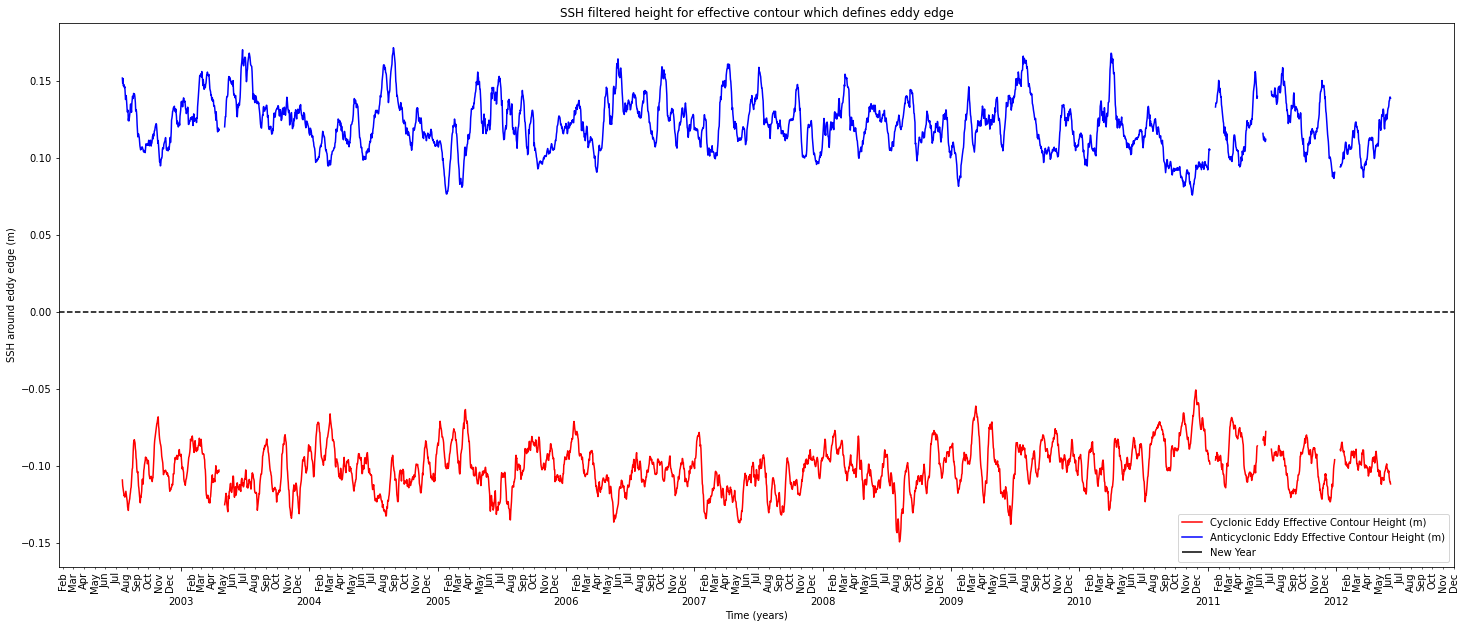

In [27]:
start = dt.datetime(2002,7,4)
new_dates = [start + dt.timedelta(days=i) for i in range(3639)]
#print(new_dates)
x = new_dates
import matplotlib.dates as mdates
xfmt_major=mdates.DateFormatter('\n\n%Y')
xfmt_minor=mdates.DateFormatter('%b')
months=mdates.MonthLocator()
years=mdates.YearLocator()
fig , ax = plt.subplots(figsize=(25, 10))
#ax.plot(x[15:-15],count_cycl[15:-15],'r',label='# of Cyclonic Eddies per Day')#,alpha=.5)#,ls='--',alpha=.5)
#ax.plot(x[15:-15],count_anti[15:-15],'b',label='# of Anticyclonic Eddies per Day')#,alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'k',label='15 day running mean')
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'k')#,label='15 day running mean')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Amplitude (m)')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'b',label='Anticyclonic Eddy Amplitude (m)')
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Speed (m/s)')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'b',label='Anticyclonic Eddy Speed (m)')
ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Effective Contour Height (m)')#,ls='--',alpha=.5)
ax.plot(x[15:-15],Rm_anti_amp[15:-15],'b',label='Anticyclonic Eddy Effective Contour Height (m)')
ax.vlines(x=['2002-01-01','2003-01-01','2004-01-01','2005-01-01','2006-01-01','2007-01-01','2008-01-01','2009-01-01','2010-01-01','2011-01-01','2012-01-01'],
          ymin=np.min(Rm_cycl_amp), ymax=np.max(Rm_anti_amp),colors='k',label='New Year')
plt.axhline(y=0, color='k', linestyle='--')
#ax.plot(x,amp_cycl_mean_2year.effective_area,'r',label='Cyclonic Eddy Effective Area  (m^2)')#,ls='--',alpha=.5)
#ax.plot(x,amp_anti_mean_2year.effective_area,'b',label='Anticyclonic Eddy Effective Area (m^2)')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(xfmt_major)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(xfmt_minor)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
#plt.title('Daily-Averaged Eddy Amplitude: Smoothed with 15 day Rm')
#plt.title('Daily-Averaged Maximum circum-averaged speed')
plt.title('SSH filtered height for effective contour which defines eddy edge')
#plt.title('# of Eddies per Day')
ax.set_xlabel("Time (years)")
ax.set_ylabel('SSH around eddy edge (m)')
#ax.set_ylabel('# of Eddies')
ax.legend(loc='best')
plt.show()